In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml

import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
#pwd

In [3]:
cfg = "../configs/configs.yaml"
def check_path(path):
    if os.path.exists(path):
        print('the path exits')

In [4]:
# load cfg file
with open(cfg, 'r') as f:
    config = yaml.safe_load(f)
print(config)

{'general_configs': {'dataset path': 'E:/xray classification/Data/chest_xray', 'dataset splitted': 'E:/xray classification/COVID/splitted/data/COVID-19_Radiography_Dataset'}, 'Augmentation': {'resize': [224, 224], 'random_crop': 224, 'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225], 'rotation': {'angle': 45}, 'random_affine': {'rotation': 20, 'translation': [0.2, 0.2], 'scaling': [0.1, 0.1], 'shear': 0.1}, 'zoomed_out': 0.3, 'horizontal_flip': 0.5, 'vertical_flip': 0.01}, 'DataLoader': {'batch_size': 64, 'num_workers': 4, 'pin_memory': True, 'data_shuffle': True, 'num_classes': 4}, 'Training': {'epochs': 100, 'learning_rate': 0.0001, 'weight_decay': 1e-05, 'model_name': 'resnet18'}}


In [5]:
dataset_dir = config["general_configs"]["dataset splitted"]
check_path(dataset_dir)

the path exits


In [6]:
splits_dir = ["train", "val", "test"]
dirs = []
for dir in splits_dir:
    data_dir = dataset_dir + "/"+ dir
    dirs.append(data_dir)
#------------------------------------


In [7]:
train_dir, val_dir, test_dir = dirs

In [8]:
dataset = {
    "train": train_dir, "val": val_dir, "test": test_dir
}

In [9]:
train_set = datasets.ImageFolder(root=dataset['train'], transform=transforms.ToTensor())
val_set = datasets.ImageFolder(root=dataset['val'], transform=transforms.ToTensor())
test_set = datasets.ImageFolder(root=dataset['test'], transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, num_workers=2)

In [10]:
train_set.classes

['covid_19', 'lung_opacity', 'normal', 'pneumonia']

In [11]:
train_set.class_to_idx

{'covid_19': 0, 'lung_opacity': 1, 'normal': 2, 'pneumonia': 3}

In [12]:
print(f'Number of Images in Train Set: {len(train_set)}')
print(f'Number of Images in Validation Set: {len(val_set)}')
print(f'Number of Images in Test Set: {len(test_set)}')

Number of Images in Train Set: 20685
Number of Images in Validation Set: 240
Number of Images in Test Set: 240


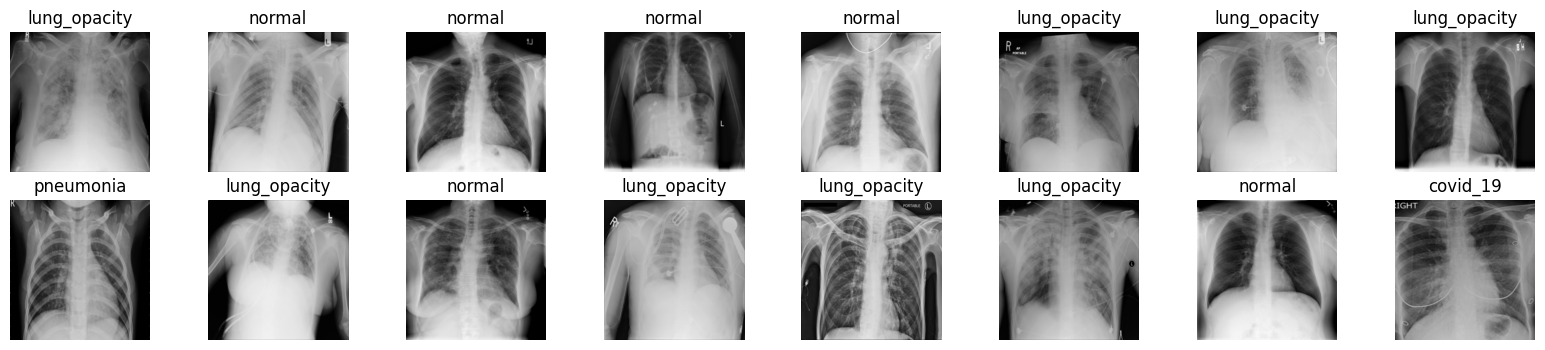

In [36]:
images, labels = next(iter(train_loader))
images = images.numpy()

fig = plt.figure(figsize=(20, 4))
for i in np.arange(16):
    ax = fig.add_subplot(2, 8, i+1)
    ax.axis('off')
    image = np.squeeze(np.transpose(images[i], (1, 2, 0)))
    ax.imshow(image)
    ax.set_title(train_set.classes[labels[i].item()])
plt.show()